In [1]:
import praw
import requests
from requests import Session
import pandas as pd
import csv 


reddit = praw.Reddit(
    client_id="_3GeCPqoqly7tXeWpjZgcg",
    client_secret="Owne9YivfOKEn7efa_QQT5aiJxqQ5w",
    user_agent="DataCollection (by u/tkarim45)"
)


In [2]:
print(reddit.read_only)


True


In [3]:
# Subreddits to fetch data from
subreddits = ["RemoteWork", "WorkFromHome"]

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)

    print(f"Fetching posts from r/{subreddit_name}...\n")
    
    with open("/Users/taimourabdulkarim/Documents/Lums/Data Engineering/Assignments/Assignment 1/data/raw/reddit_data.csv", "a", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        # title, post text, author, date, upvotes, subreddit name.
        
        writer.writerow(["Title", "Post Text", "Author", "Date", "Upvotes", "Subreddit Name"])

        for post in subreddit.hot(limit=200):  # Change 'hot' to 'new', 'top', etc.
            title = post.title
            post_text = post.selftext
            author = str(post.author)
            date = pd.to_datetime(post.created_utc, unit="s")
            upvotes = post.score
            subreddit_name = subreddit_name

            writer.writerow([title, post_text, author, date, upvotes, subreddit_name])

            
print("Data collection complete!")


Fetching posts from r/RemoteWork...

Fetching posts from r/WorkFromHome...

Data collection complete!


In [23]:
# Read the csv file
df = pd.read_csv("/Users/taimourabdulkarim/Documents/Lums/Data Engineering/Assignments/Assignment 1/data/raw/reddit_data.csv")
df.head()


,Title,Post Text,Author,Date,Upvotes,Subreddit Name
0,POLL: What is the best job board for finding r...,We try to avoid posts directly about job board...,Razaberry,2024-05-14 16:27:10,251,RemoteWork
1,Landed a Remote Job When I Least Expected It,"Around January 14th, my previous company asked...",Current_Scarcity6611,2025-02-16 02:14:46,97,RemoteWork
2,Has this sub lost its way?,"I'm ready for the downvotes, but why doesn't t...",FamiliarBuilder1115,2025-02-15 17:49:02,306,RemoteWork
3,Jamie Dimon is fed up with remote work: 'I don...,NaN,ThereWas,2025-02-15 19:50:08,147,RemoteWork
4,Weird etiquette expert obsessed with RTO,The fact that this woman [discusses](https://w...,AdMurky3039,2025-02-16 05:24:19,20,RemoteWork


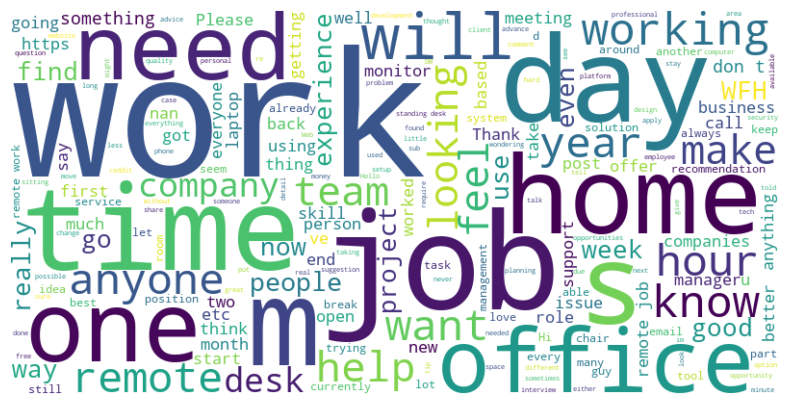

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

combined_text = ' '.join(df['Post Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
